##  Respuestas del Examen Parcial de Inteligencia Artificial 


1. Considera una elección en la que votarán un millón de personas. $490.000$ personas votarán por el candidato $A$ y $510.000$ personas votarán por el candidato $B$. Un día antes de las elecciones, la compañía 'Z' realiza una encuesta entre $1000$ votantes elegidos al azar. Calcule si 'Z' predecirá el ganador correctamente con una semilla de 2.

    Realiza la encuesta $1000$ veces. Cuenta cuántas veces el resultado de la encuesta indica que el candidato $A$ gana y cuántas veces el resultado de la encuesta dice que el candidato $B$ gana. ¿Cuál es la probabilidad de que 'Z' prediga al ganador correcto basándose en estas $1000$ encuestas de $1000$ personas?

    Calcula la probabilidad de que 'Z'  prediga al ganador correcto basándose en $1000$ encuestas de $5000$ personas. ¿La probabilidad de que 'Z' prediga al ganador correcto aumenta significativamente cuando se encuesta a $5000$ personas?.
    
Sugerencia: Revisa el siguiente código, que responde el primer ítem de la pregunta.


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

rnd.seed(2)
encuesta = rnd.choice([0, 1], 1000, p=[0.49, 0.51]) 
encuesta_A = np.count_nonzero(encuesta == 0)
print('Encuesta por A:', encuesta_A)
if encuesta_A > 500: 
    print('Z predice el ganador equivocado')
else:
    print('Z predice el ganador correcto')

Encuesta por A: 522
Z predice el ganador equivocado


In [3]:
Agana = 0
Bgana = 0
for i in range(1000):
    encuesta = rnd.choice([0, 1], 1000, p=[0.49, 0.51])
    encuesta_A = np.count_nonzero(encuesta == 0)
    if encuesta_A > 500: 
        Agana += 1
    else:
        Bgana += 1
print('1000 encuestas de 1000 personas')
print('Probabilidad que Z predice que A es el ganador:', Agana / 1000)

1000 encuestas de 1000 personas
Probabilidad que Z predice que A es el ganador: 0.262


In [4]:
Agana = 0
Bgana = 0
for i in range(1000):
    encuesta = rnd.choice([0, 1], 5000, p=[0.49, 0.51])
    encuesta_A = np.count_nonzero(encuesta == 0)
    if encuesta_A > 2500: 
        Agana += 1
    else:
        Bgana += 1
print('1000 encuestas de 1000 personas')
print('Probabilidad que Z predice que A es el ganador:', Agana / 1000)

1000 encuestas de 1000 personas
Probabilidad que Z predice que A es el ganador: 0.071


2.Carga el conjunto de datos `bank-campaign.csv`

Este conjunto de datos es el éxito del marketing de una campaña de promoción telefónica hecha por un banco. El objetivo es predecir el  resultado binario, de que es si un cliente se suscribió a un nuevo producto.

Divide los datos en un conjunto de entrenamiento y de prueba usando `train_test_split`. Utiliza la validación cruzada para evaluar un `RandomForestClassifier` en la parte de entrenamiento. Luego use `GridSearchCV` para ajustar los parámetros `max_features` y `max_depth`. Crea un mapa de calor con los resultados de la validación cruzada para todo el grid.

Dado que el conjunto de datos es un poco más grande, podría ser útil submuestrear el conjunto de datos, ya sea manualmente o dentro de `train_test_split`. Por lo general, es una buena idea crear un prototipo de tu código con un subconjunto de datos.


In [5]:
import pandas as pd
data = pd.read_csv("bank-campaign.csv")
display(data.head())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no


In [6]:
y = data.target
X = data.drop("target", axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

print("Proporcion de etiquetas:\n", y.value_counts(normalize=True))

Proporcion de etiquetas:
 no     0.887346
yes    0.112654
Name: target, dtype: float64


In [8]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier().fit(X_train, y_train)
#print("Profundidad de arbol: ", arbol. get_depth())
print("n_caracteristicas: ", X.shape[1])

n_caracteristicas:  63


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [3, 5, 8, 10, 15, 20, 30],
              'max_features': [4, 8, 16, 20, 25, 40]}
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid=param_grid)

In [10]:
grid.fit(X_train[::10], y_train[::10])

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 8, 10, 15, 20, 30], 'max_features': [4, 8, 16, 20, 25, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [11]:
res = pd.DataFrame(grid.cv_results_)
print(res.keys())
res_piv = pd.pivot_table(
    res, values='mean_test_score', index='param_max_depth',
    columns='param_max_features')

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')


In [12]:
display(res_piv)

param_max_features,4,8,16,20,25,40
param_max_depth,,,,,,
3,0.888997,0.893851,0.899353,0.898706,0.901294,0.900971
5,0.893528,0.898706,0.902265,0.902265,0.906472,0.899353
8,0.892880,0.900647,0.903236,0.901942,0.904854,0.903236
10,0.900324,0.907767,0.898382,0.902589,0.905502,0.905502
15,0.894175,0.900647,0.903883,0.901294,0.900971,0.899029
20,0.900000,0.900647,0.900971,0.904207,0.902589,0.897735
30,0.895469,0.899676,0.902265,0.898706,0.900971,0.907443


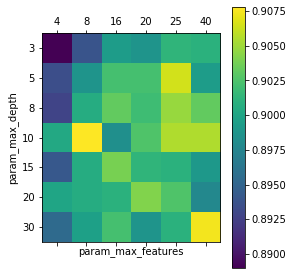

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(res_piv.values)
plt.xlabel(res_piv.columns.name)
plt.xticks(range(res_piv.shape[1]), res_piv.columns)
plt.ylabel(res_piv.index.name)
plt.yticks(range(res_piv.shape[0]), res_piv.index)
plt.colorbar()

3. Programa alguno de los siguientes algoritmos, BSF, DSF, búsqueda de costo uniforme o A* en el lenguaje de tu elección y realiza una prueba con el ejemplo de 8-puzzle dado en en las notas de clase.

Para este ejercicio elegiremos DFS, basado en la solución de Prajwal Raj Basnet:https://github.com/Prajwalrajbasnet/8-puzzle-game.

In [14]:
class Pila(): ## Estructura de datos a usar
    def __init__(self, inicial):
        self.items = [inicial]
    def is_empty(self):
        return self.items == []
    def push(self, item):
        self.items.append(item)
    def pop(self):
        return self.items.pop()
    def size(self):
        return len(self.items)

In [15]:
class Estado():
    derecha = {0, 1, 3, 4, 6, 7}
    izquierda = {1, 2, 4, 5, 7, 8}
    arriba = {3, 4, 5, 6, 7, 8}
    abajo = {0, 1, 2, 3, 4, 5}
    
    def __init__(self, board_config, padre, movimiento):
        self.board_config = board_config
        self.board_config_list = list(map(int,board_config.split(','))) 
        self.i = self.board_config_list.index(0)
        self.padre = padre
        self.movimiento = movimiento 
        
    def obtener_hijos(self):
        hijos = []
        if self.i in Estado.arriba:
            nboard_config = self.board_config_list[:]
            nboard_config[self.i], nboard_config[self.i-3] = nboard_config[self.i-3], nboard_config[self.i]
            hijos.append(Estado(','.join(map(str,nboard_config)), self.board_config,'arriba'))
        if self.i in Estado.abajo:
            nboard_config = self.board_config_list[:]
            nboard_config[self.i], nboard_config[self.i+3] = nboard_config[self.i+3], nboard_config[self.i]
            hijos.append(Estado(','.join(map(str,nboard_config)), self.board_config,'abajo'))
        if self.i in Estado.izquierda:
            nboard_config = self.board_config_list[:]
            nboard_config[self.i], nboard_config[self.i-1] = nboard_config[self.i-1], nboard_config[self.i]
            hijos.append(Estado(','.join(map(str,nboard_config)), self.board_config,'izquierda'))
        if self.i in Estado.derecha:
            nboard_config = self.board_config_list[:]
            nboard_config[self.i], nboard_config[self.i+1] = nboard_config[self.i+1], nboard_config[self.i]
            hijos.append(Estado(','.join(map(str,nboard_config)), self.board_config,'derecha'))
        return hijos

    def __str__(self):
        return self.board_config

In [16]:
def dfs(inicial,objetivo):
    limite = Pila(inicial)
    lista_board_config_limite = {inicial.board_config}
    explorado = set()
    espacio_busqueda = {}

    while not limite.is_empty():
        estado = limite.pop()
        explorado.add(estado.board_config)
        espacio_busqueda[estado.board_config] = estado
        
        if objetivo == estado.board_config:
            mejor_ruta = []
            estado_actual = estado

            while not estado_actual.padre == None:
                mejor_ruta.insert(0, estado_actual.movimiento)
                estado_actual = espacio_busqueda[estado_actual.padre]
            
            return mejor_ruta, len(mejor_ruta)
    
        for hijo in estado.obtener_hijos():
            if hijo.board_config not in explorado and hijo not in lista_board_config_limite:
                limite.push(hijo)
                lista_board_config_limite.add(hijo.board_config)
    
    return "Error"

In [17]:
inicio = '5,3,0,7,1,2,8,4,6' 
objetivo = '0,1,2,3,4,5,6,7,8'
estado_inicial = Estado(inicio, None, None)

print(dfs(estado_inicial, objetivo))

(['izquierda', 'izquierda', 'abajo', 'derecha', 'derecha', 'abajo', 'izquierda', 'izquierda', 'arriba', 'derecha', 'derecha', 'abajo', 'izquierda', 'izquierda', 'arriba', 'derecha', 'derecha', 'abajo', 'izquierda', 'izquierda', 'arriba', 'derecha', 'derecha', 'abajo', 'izquierda', 'izquierda', 'arriba', 'derecha', 'derecha', 'abajo', 'izquierda', 'arriba', 'derecha', 'abajo', 'izquierda', 'izquierda', 'arriba', 'derecha', 'derecha', 'abajo', 'izquierda', 'izquierda', 'arriba', 'derecha', 'derecha', 'abajo', 'izquierda', 'izquierda', 'arriba', 'derecha', 'derecha', 'abajo', 'izquierda', 'izquierda', 'arriba', 'derecha', 'derecha', 'abajo', 'izquierda', 'izquierda', 'arriba', 'arriba', 'derecha', 'derecha', 'abajo', 'izquierda', 'izquierda', 'abajo', 'derecha', 'derecha', 'arriba', 'izquierda', 'izquierda', 'abajo', 'derecha', 'derecha', 'arriba', 'izquierda', 'izquierda', 'abajo', 'derecha', 'derecha', 'arriba', 'izquierda', 'izquierda', 'abajo', 'derecha', 'derecha', 'arriba', 'izquier

4. Dadas las entradas,$A, b$,  un valor inicial $x$, un número máximo de iteraciones $i_{\max}$, y una tolerancia de error $\epsilon < 1$, implementa el siguiente pseudocódigo (puedes acoplar a algunas cambios), tomada desde el tutorial de `An Introduction to the Conjugate Gradient Method Without the Agonizing Pain` de Jonathan Richard Shewchuk.

![](GD.png)

Este algoritmo termina cuando se excede el número máximo de iteraciones $i_{\max}$ o cuando $\Vert r_{(i)}\Vert \leq \epsilon \Vert r_{(0)}\Vert$.

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools

A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]]) 
c = 0.0

def f(x, A, b, c):
    return float(0.5 * x.T * A * x - b.T * x + c)

def figura1(A, b, c):
    #fig = plt.figure(figsize=(10,8))
    #qf = fig.gca(projection='3d')
    size = 20
    x1 = list(np.linspace(-6, 6, size))
    x2 = list(np.linspace(-6, 6, size))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x, A, b, c)
    #qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
    return x1, x2, zs


In [19]:
x1, x2, zs = figura1(A, b, c)

In [20]:
def pasosContornos(x1, x2, zs, pasos=None):
    fig = plt.figure(figsize=(6,6))
    cp = plt.contour(x1, x2, zs, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if pasos is not None:
        pasos = np.matrix(pasos)
        plt.plot(pasos[:,0], pasos[:,1], '-o')
    fig.show()

El algoritmo planteado en el problema:

In [21]:
x = np.matrix([[-2.0],[-2.0]])
pasos = [(-2.0, -2.0)]
i = 0
imax = 10
eps = 0.01
r = b - A * x
delta = r.T * r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    alpha = float(delta / (r.T * (A * r)))
    x = x + alpha * r
    pasos.append((x[0,0], x[1,0])) 
    r = b - A * x
    delta = r.T * r
    i += 1

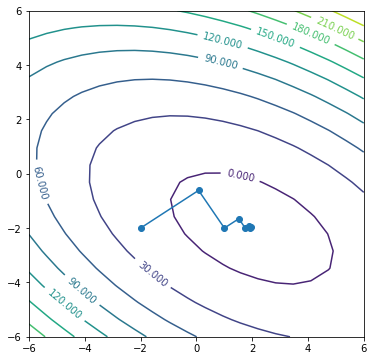

In [22]:
pasosContornos(x1, x2, zs, pasos)

5. En este ejercicio usaremos el script `dArbol.py` y el conjunto de datos `party.data`. Usando el algoritmo ID3 en esta sección construimo un árbol de decisiones orientado a la clasificación para decidir qué hacer por la noche, en un conjunto de datos que enumera todo lo que hemos hecho durante los últimos 10 días. Calcula la entropía y encuentra qué característica tiene la máxima ganancia de información. Realiza el mismo procedimiento con el conjunto de datos `tennis.csv`.

In [23]:
import dArbol

arbol = dArbol.dArbol()
fiesta,clases,caracteristicas = arbol.leer_data('party.data')
t=arbol.construye_arbol(fiesta,clases,caracteristicas)
arbol.imprimeArbol(t,' ')

print(arbol.clasificarTodo(t,fiesta))

for i in range(len(fiesta)):
    arbol.clasificar(t,fiesta[i])

  Fiesta
  Si
 	 	->	 Fiesta
  No
 	 Fecha
 	 Urgente
 		 	->	 Estudio
 	 Ninguna
 		 	->	 Pub
 	 Near
 		 Desocupado
 		 No
 			 	->	 Estudio
 		 Si
 			 	->	 TV
['Fiesta', 'Estudio', 'Fiesta', 'Fiesta', 'Pub', 'Fiesta', 'Estudio', 'TV', 'Fiesta', 'Estudio']


El valor de la entropia es $1.6855$. Si $S$ representa el conjunto de ejemplos, entonces $Gain(S, Fecha) = 0.5345, Gain(S, Fiesta) = 1.0, Gain(S, Desocupado) = 0.21$.

Por lo tanto, el nodo raíz será la característica `Fiesta`, que tiene dos valores de característica (`si` y `no`), por lo que tendrá dos ramas. Cuando miramos la rama `si`, vemos que en los cinco casos en los que había una `Fiesta`, fuimos a ella, por lo que simplemente pusimos un nodo de hoja allí, diciendo `Fiesta`. Para la rama `no`, de los cinco casos hay tres resultados diferentes, por lo que ahora debemos elegir otra función. 

Hemos utilizado la característica `Fiesta`, por lo que solo necesitamos calcular la ganancia de información de los otros dos en los ejemplos restantes:

$Gain(S, Fecha) = 0.971, Gain(S, Desocupado) = 0.1710$.

6. Realiza una comparación de Naive Bayes multinomiales y gaussianos, para ello utiliza la documentación [sklearn.naive_bayes.MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) y [sklearn.naive_bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) y el conjunto de datos `diabetes.csv`. Explica tus resultados.

In [24]:
import pandas as pd

pima = pd.read_csv('diabetes.csv', index_col = 0)
pima.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [25]:
X = pima.drop('Outcome', axis=1)
y = pima.Outcome

In [26]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import metrics
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_class = mnb.predict(X_test)

metrics.accuracy_score(y_test, y_pred_class)

0.5364583333333334

In [27]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_class = gnb.predict(X_test)

metrics.accuracy_score(y_test, y_pred_class)

0.78125

Cuando aplicamos la clasificación Naive Bayes a un conjunto de datos con características continuas, es mejor utilizar `Gauss Naive Bayes` que `Multinomial Naive Bayes`. Este último es adecuado para conjuntos de datos que contienen características discretas (por ejemplo, conteo de palabras).

7. Carga los valores $x$, $y$ de $20$ puntos de datos del archivo `xydata.dat`. Ajusta una línea recta a través de los datos usando la función `linregress` de `scipy.stats`. Ten en cuenta que la función `linregress` devuelve otros $3$ valores más allá de la pendiente y la intersección (use linregress?. Traza los datos y la línea recta ajustada. Agrega una leyenda. Agrega el RMSE como título del gráfico. Imprime los valores óptimos para la pendiente y la intersección de la línea recta en la pantalla.

    Realiza el procedimiento anterior con un polinomio de segundo grado (una parábola) a través de los datos usando la función `np.polyfit`.¿Mejoró el RMSE? 

    Ahora realiza el mismo procedimiento con la función `f(x)=Aexp (ax) + b` a través de los datos usando la función `curve_fit` de `scipy.optimize`. ¿Mejoró el MSE?

     Calcula los valores óptimos (en el sentido de mínimos cuadrados) de $a$ y $b$ usando la suma de errores cuadrados (usando las matrices `xdata` e `ydata` para los tres puntos dados:

    ```
    xdata = np.array([5.0, 10.0, 15.0])
    ydata = np.array([3.0, 6.0, 7.0])
    ```
      A continuación, usa la función `linregress` del paquete `scipy.stats` para calcular los valores óptimos y verifique que la función `linregress` dé las mismas respuestas. Crea una gráfica que muestra los tres puntos de datos y la línea recta ajustada.
      
Sugerencia: se puede utilizar `np.loadtxt('xydata.dat')` para cargar los datos. 

pendiente, intercepto: 6.077443700312609 42.58245735877516


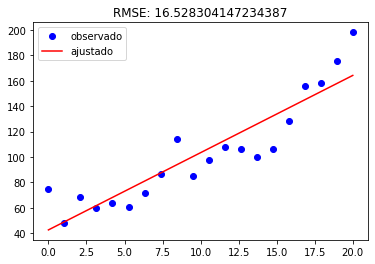

In [28]:
from scipy.stats import linregress
x, y = np.loadtxt('xydata.dat')
pendiente, intercept, r_valor, p_valor, std_err = linregress(x, y)
yfit = pendiente * x + intercept
plt.figure()
plt.plot(x, y, 'bo', label='observado')
plt.plot(x, yfit, 'r', label='ajustado')
rmse = np.sqrt(np.sum((yfit - y) ** 2) / len(y))
plt.title('RMSE: '+str(rmse))
plt.legend(loc='best')
print('pendiente, intercepto:', pendiente, intercept)

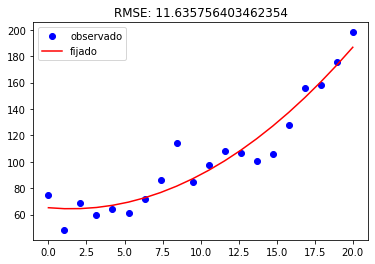

In [29]:
x, y = np.loadtxt('xydata.dat')
a, b, c = np.polyfit(x, y, 2)
yfit = a * x ** 2 + b * x + c
plt.figure()
plt.plot(x, y, 'bo', label='observado')
plt.plot(x, yfit, 'r', label='fijado')
rmse = np.sqrt(np.sum((yfit - y) ** 2) / len(y))
plt.legend(loc='best')
plt.title('RMSE: '+str(rmse));

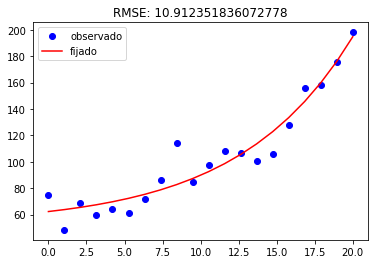

In [30]:
from scipy.optimize import curve_fit

def func(x, A, a, b):
    y = A * np.exp(a * x) + b
    return y

popt, pcov = curve_fit(func, x, y)
yfit = func(x, *popt)
plt.figure()
plt.plot(x, y, 'bo', label='observado')
plt.plot(x, yfit, 'r', label='fijado')
plt.legend(loc='best')
rmse2 = np.sqrt(np.sum((yfit - y) ** 2) / len(y))
plt.title('RMSE: '+str(rmse2));

Con respecto al último ítem del problema:

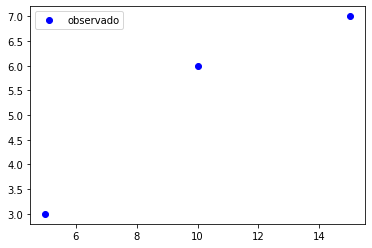

In [31]:
xdata = np.array([5.0, 10.0, 15.0])
ydata = np.array([3.0, 6.0, 7.0])
plt.plot(xdata, ydata, 'bo', label='observado')
plt.legend();

In [32]:
def sse(a, b, x=xdata, y=ydata):
    error = y - (a * x + b)
    return np.sum(error ** 2)

In [33]:
xdata = np.array([5.0, 10.0, 15.0])
ydata = np.array([3.0, 6.0, 7.0])
N = len(xdata)
a = (N * np.sum(xdata * ydata) - np.sum(xdata) * np.sum(ydata) ) / \
    (N * np.sum(xdata ** 2) - np.sum(xdata) * np.sum(xdata))
b = np.mean(ydata) - a * np.mean(xdata)
print('Valores optimos de a y b:', a, b)
print('sse:', sse(a, b))

Valores optimos de a y b: 0.4 1.333333333333333
sse: 0.6666666666666667


In [34]:
from scipy.stats import linregress
pendiente, intercept, r, p, s = linregress(xdata, ydata)
print('Pendiente e intercepto con respecto a linregress:', pendiente, intercept)

Pendiente e intercepto con respecto a linregress: 0.4 1.333333333333333


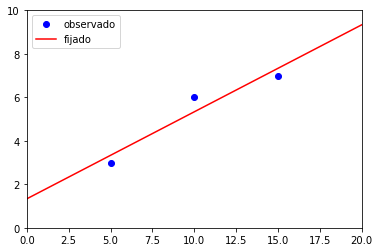

In [35]:
plt.plot(xdata, ydata, 'bo', label='observado')
plt.xlim(0, 20)
plt.ylim(0, 10)
x = np.linspace(0, 20, 2)
yfit = a * x + b
plt.plot(x, yfit, 'r', label='fijado')
plt.legend(loc='best');

8. Opcional (no tiene puntaje): Explora la página [https://aipaygrad.es/](https://aipaygrad.es/).